In [3]:
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import math
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA

In [4]:
#reading the csv file
bbazar = pd.read_excel('bigbazar_dataset.xlsx')

In [5]:
ts_data = bbazar[['transactionDate','sale_price_after_promo']]
print(ts_data.dtypes)

transactionDate           datetime64[ns]
sale_price_after_promo           float64
dtype: object


In [6]:
#groups the records by month and shows the sales for each month
per = ts_data.transactionDate.dt.to_period('M')
g = ts_data.groupby(per)
final = g.sum().reset_index()

In [7]:
#this will add last day of the month to each record
final['transactionDate'] = pd.PeriodIndex(final['transactionDate'], freq='M').to_timestamp(how='end')

In [33]:
#final

In [8]:
Sales_price = final['sale_price_after_promo']

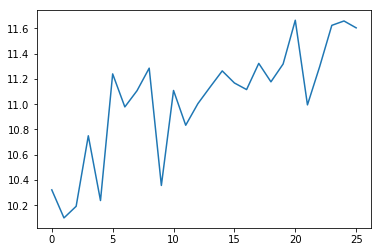

In [9]:
#taking log of the prices because we will get accurate forecasts
logprice = np.log(Sales_price)
logprice
plt.plot(logprice)
plt.show()

In [23]:
price_matrix = logprice.values
model = ARIMA(price_matrix, order=(0,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   25
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -12.927
Method:                           css   S.D. of innovations              0.406
Date:                Tue, 16 Oct 2018   AIC                             29.855
Time:                        15:22:48   BIC                             32.292
Sample:                             1   HQIC                            30.531
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0513      0.081      0.632      0.534      -0.108       0.210


In [32]:
predictions = model_fit.predict(27,32, typ='levels')
predictions
predictionsadjusted=np.exp(predictions)
predictionsadjusted

array([115283.37430321, 121348.72156461, 127733.18194725, 134453.54479225,
       141527.48277003, 148973.59835452, 156811.4727424 ])